# Screening sera from defined age cohorts
Here, we analyze initial rough screens of sera from three age cohorts: 0-5, 15-20 (both from Seattle Childrens set of samples), and 40-45 (from HAARVI cohort). Our goal is to identify sera that potently neutralize the wildtype library strain A/HongKong/45/2019. Sera with high enough potency will be analyzed in deep mutational scanning experiments with this library.

For initial screens, I test 8 dilutions of a given serum starting at 0.05 (1:20), and only run a single technical replicate. DMS candidates are then re-run to resolve the full curve with 2 replicates. 

I selected 10 sera from each age cohort for DMS analysis, and finalized curves for these sera are plotted in `finalized_neut_curves.ipynb`. 

In [1]:
import pandas as pd

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import matplotlib
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### 0-5yo, run 1
Note that for this initial run, I hadn't run an MOI test for the HK/19 GFP virus, and was using an MOI that was too high and saturated the GFP signal. I initially wasn't sure if this was due to background fluorescence from the media, so I also tried aspirating the media on some plates and replacing with PBS. 

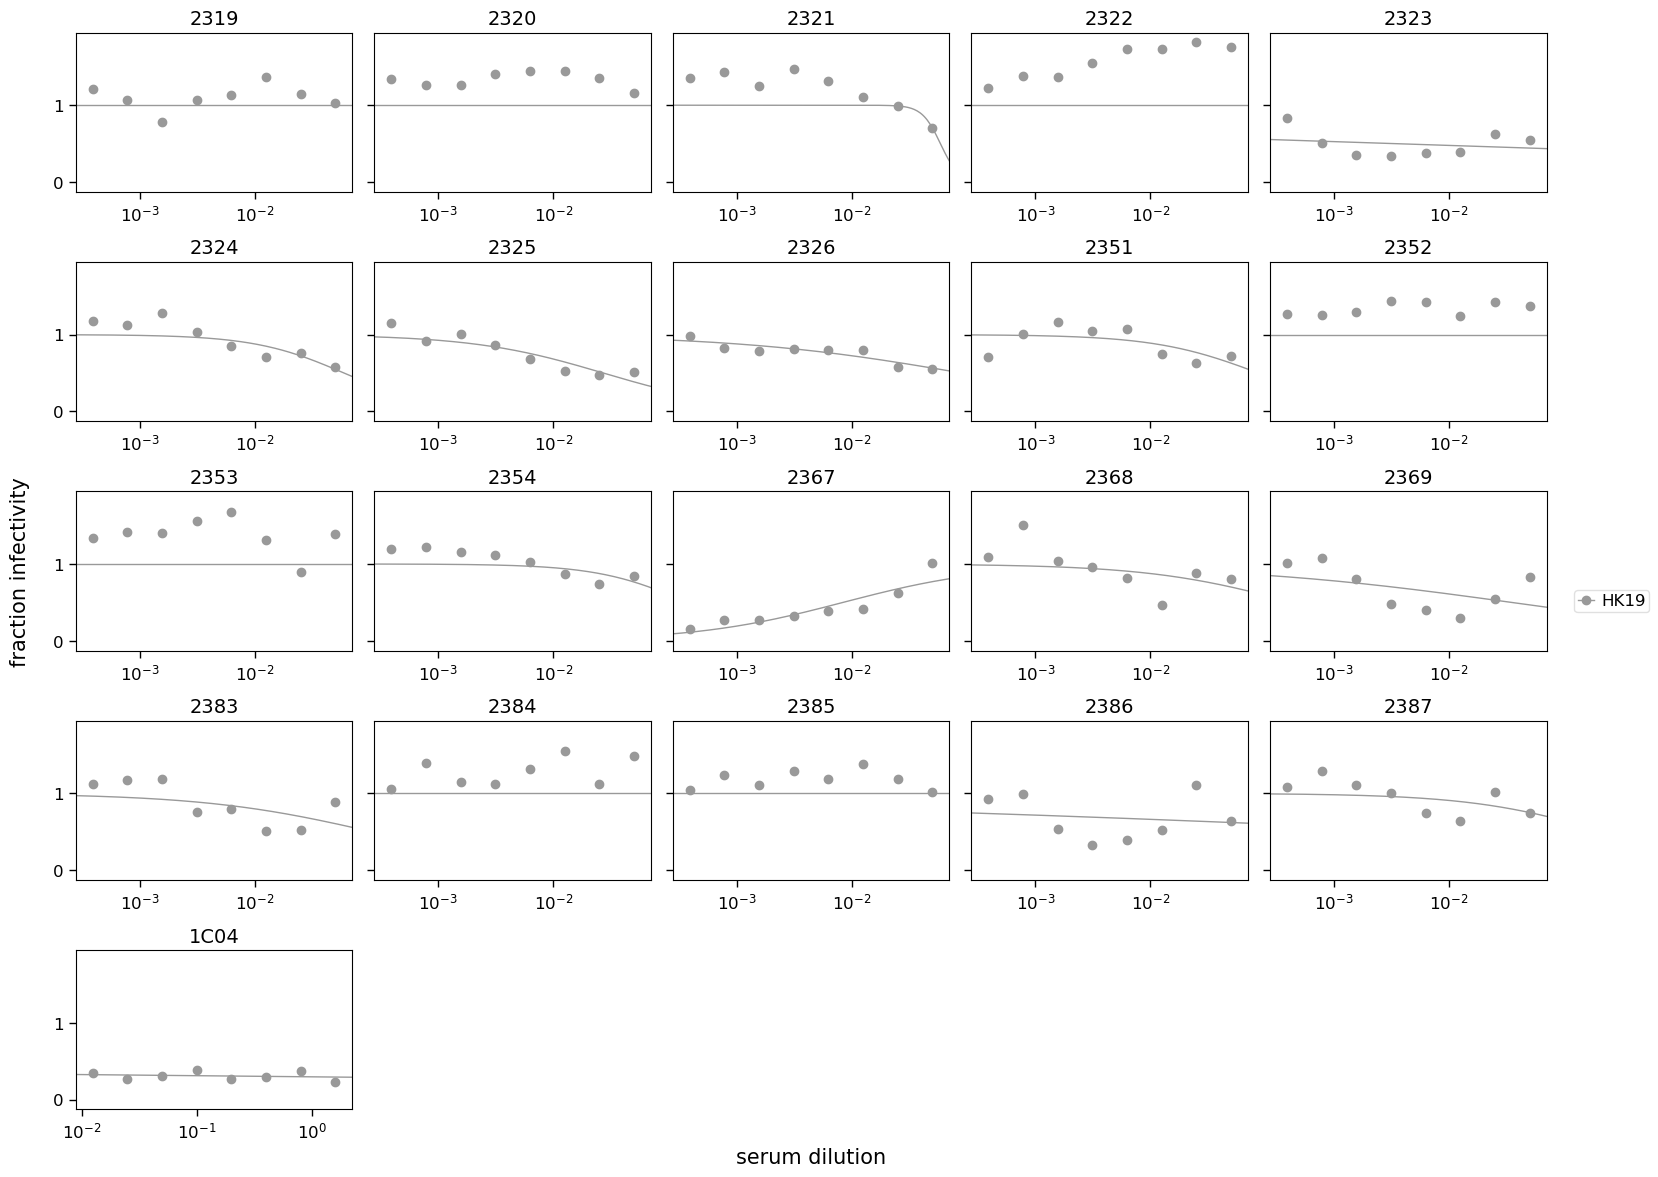

In [2]:
neut_data_run1 = pd.read_csv('neut_data/230208_neuts_tidy.csv')

# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data_run1)

fig, axes = fits.plotSera(ncol=5,
                          xlabel='serum dilution',
                          sharex = False
                         )

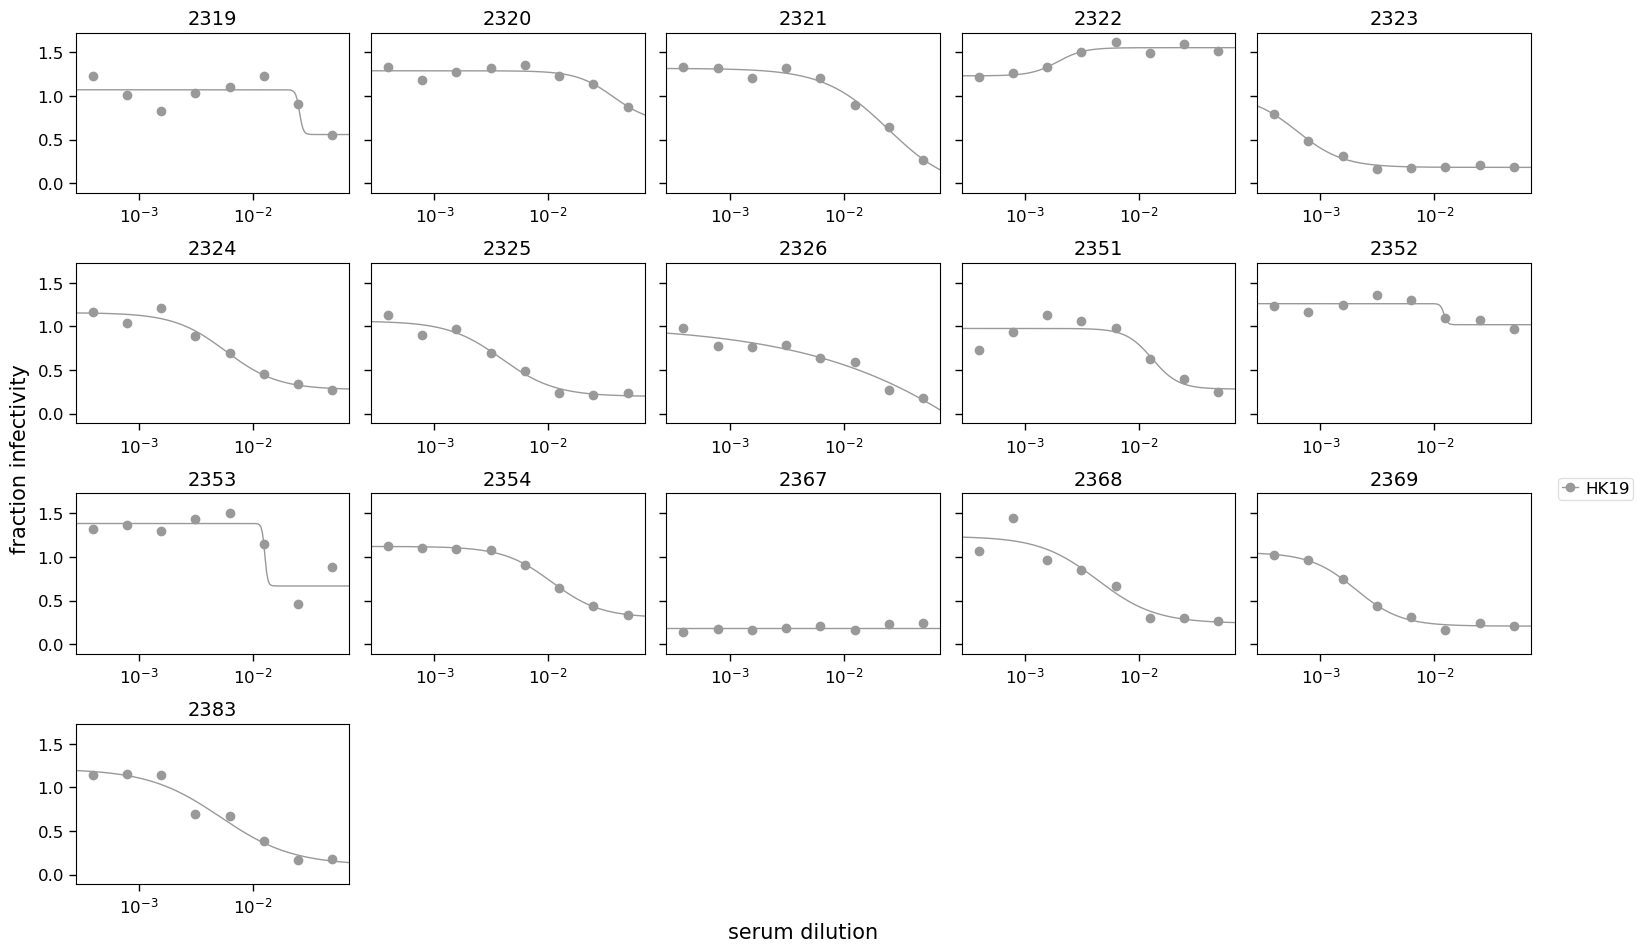

In [3]:
# NAM was replaced with PBS, after reading the first time
neut_data_pbs = pd.read_csv('neut_data/230208_neuts_tidy_PBS.csv')

neut_data_pbs['serum'] =neut_data_pbs['serum'].astype(object)

# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data_pbs, fixtop=False, fixbottom=False)

fig, axes = fits.plotSera(ncol=5,
                          xlabel='serum dilution',
                          sharex = False
                         )

### 0-5yo, run 2
These samples, and all following neuts, were run at the correct MOI.

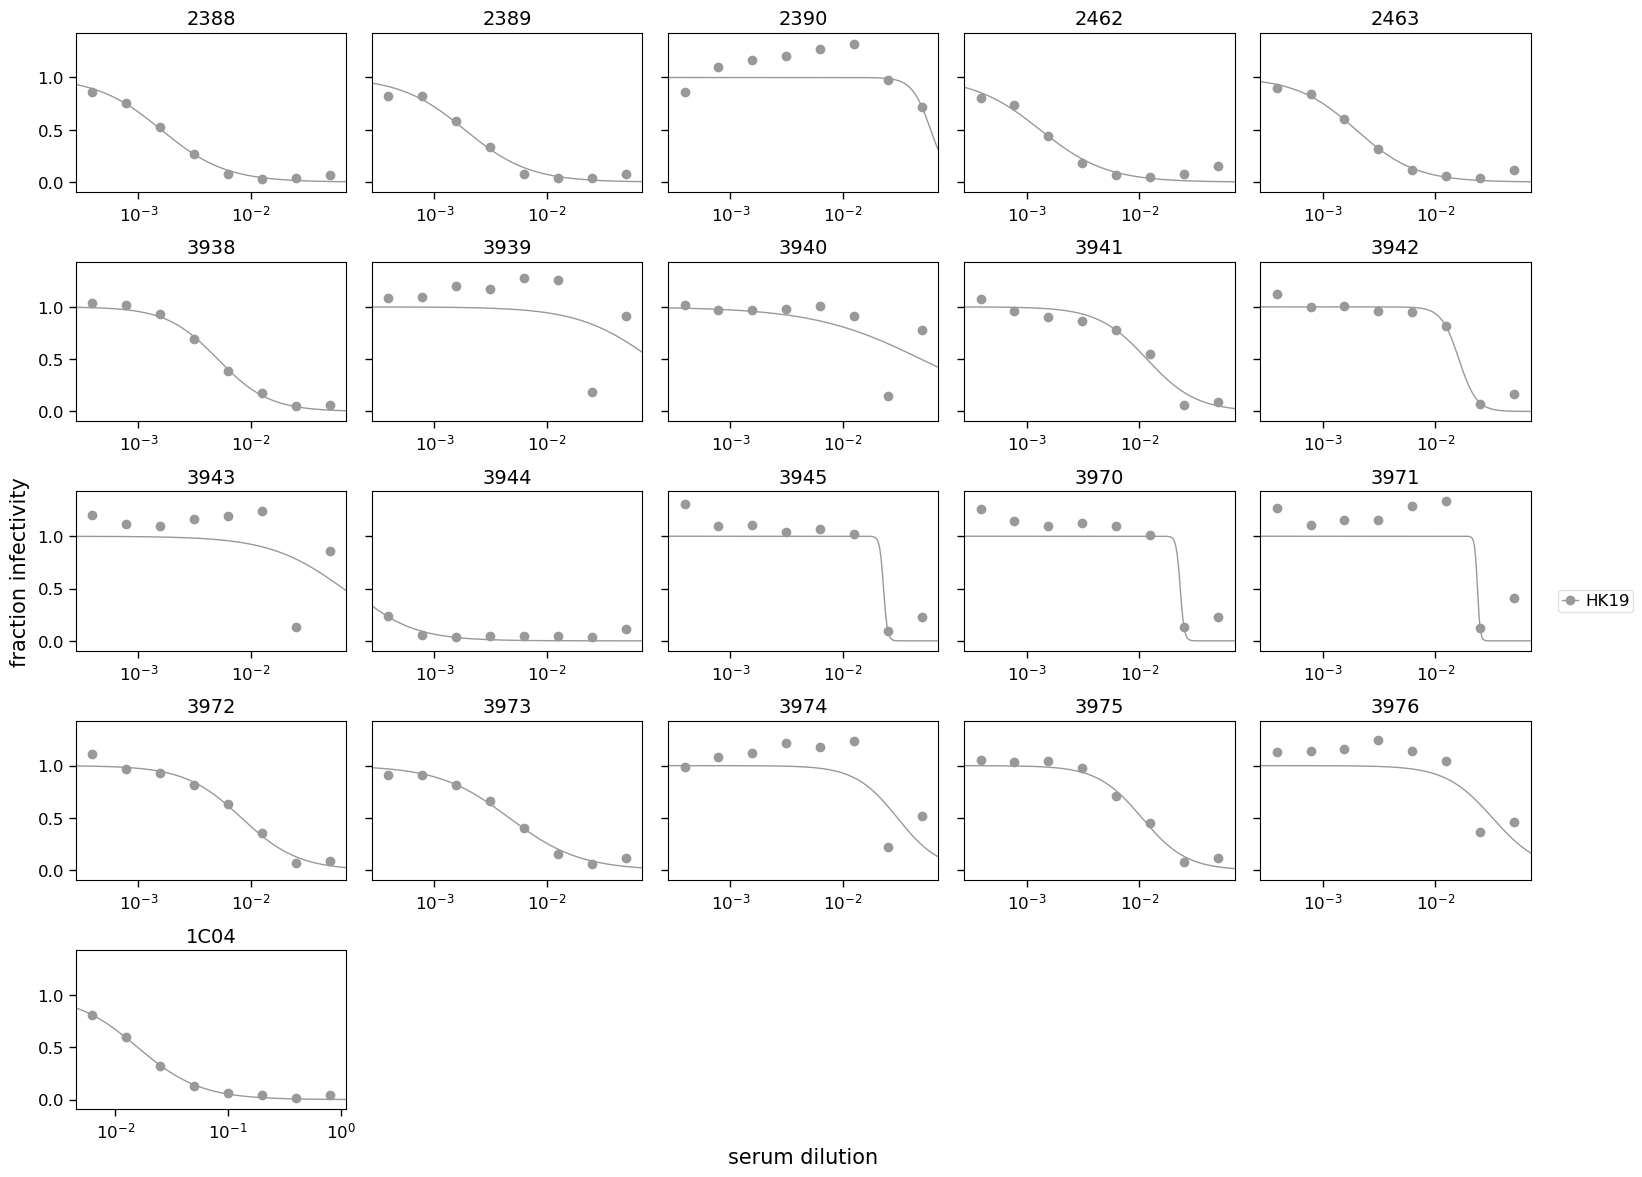

In [4]:
neut_data_run2 = pd.read_csv('neut_data/230210_neuts_tidy.csv')

# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data_run2)

fig, axes = fits.plotSera(ncol=5,
                          xlabel='serum dilution',
                          sharex = False
                         )

### 0-5yo candidates from initial screen

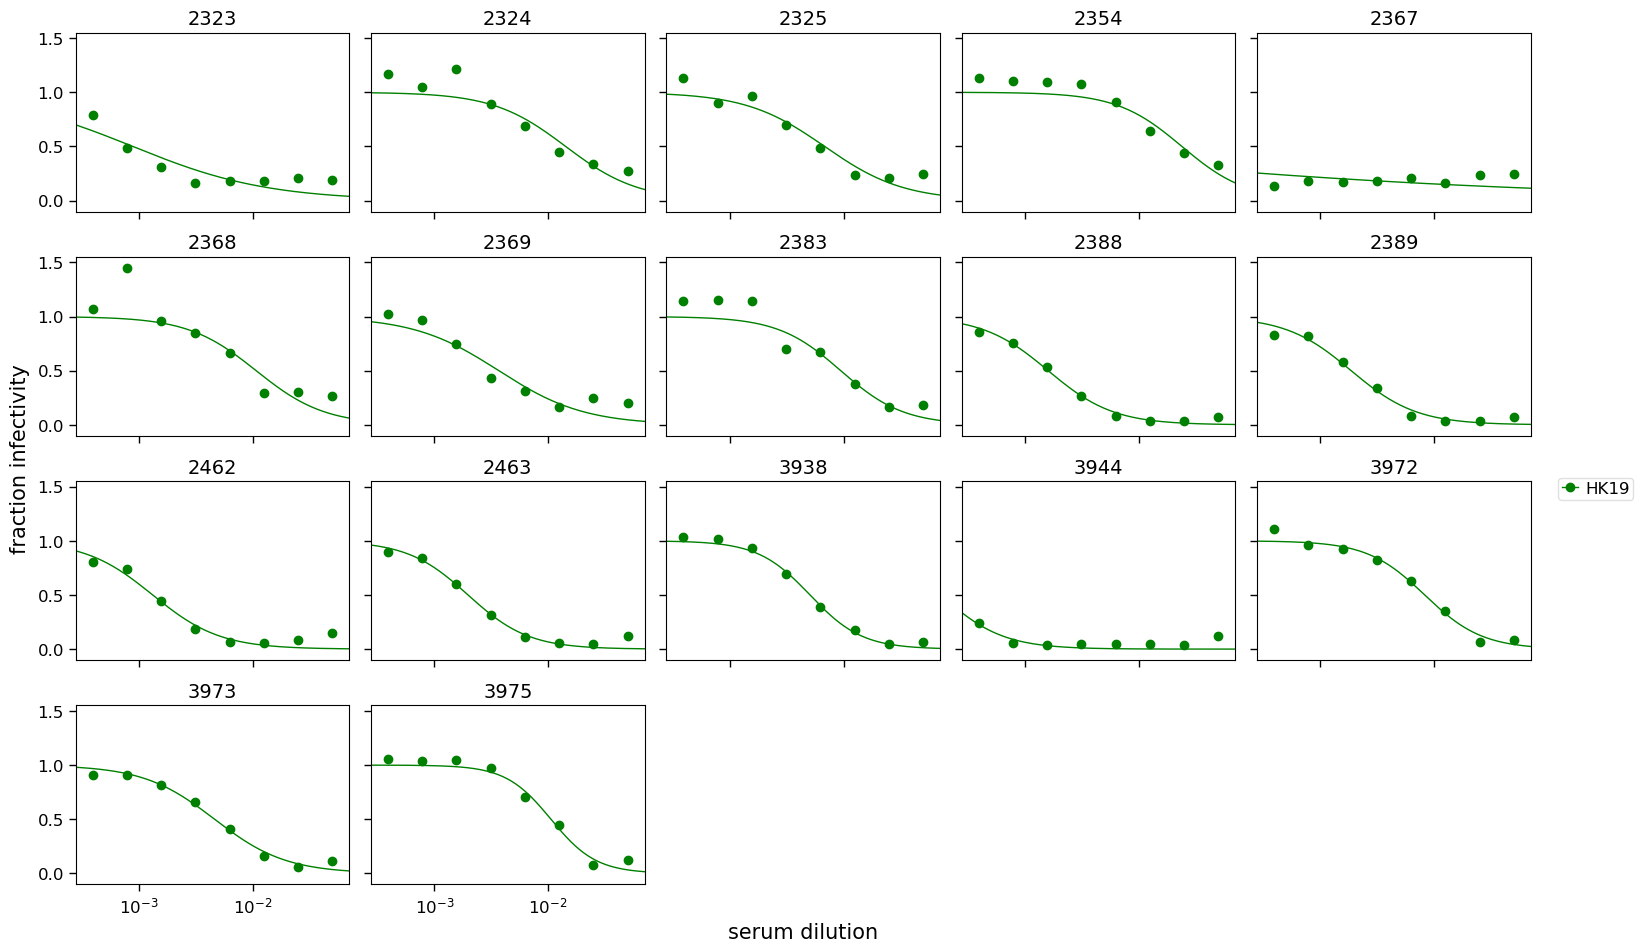

In [5]:
full_runs = pd.concat([neut_data_pbs, neut_data_run2])
neut_hits_list = [2323, 2324, 2325, 2354, 2367, 2368, 2369, 2383, '2388', '2389', 
                  '2462', '2463', '3938', '3944', 
                  '3972', '3973', '3975']

neut_hits = full_runs[full_runs['serum'].isin(neut_hits_list)]

fits = neutcurve.CurveFits(neut_hits)

fig, axes = fits.plotSera(ncol=5,
                          xlabel='serum dilution',
                          virus_to_color_marker={
                              'HK19': ('green', 'o')
                          },
                          sharex = True
                         )

### Clean run of 0-5yo candidates

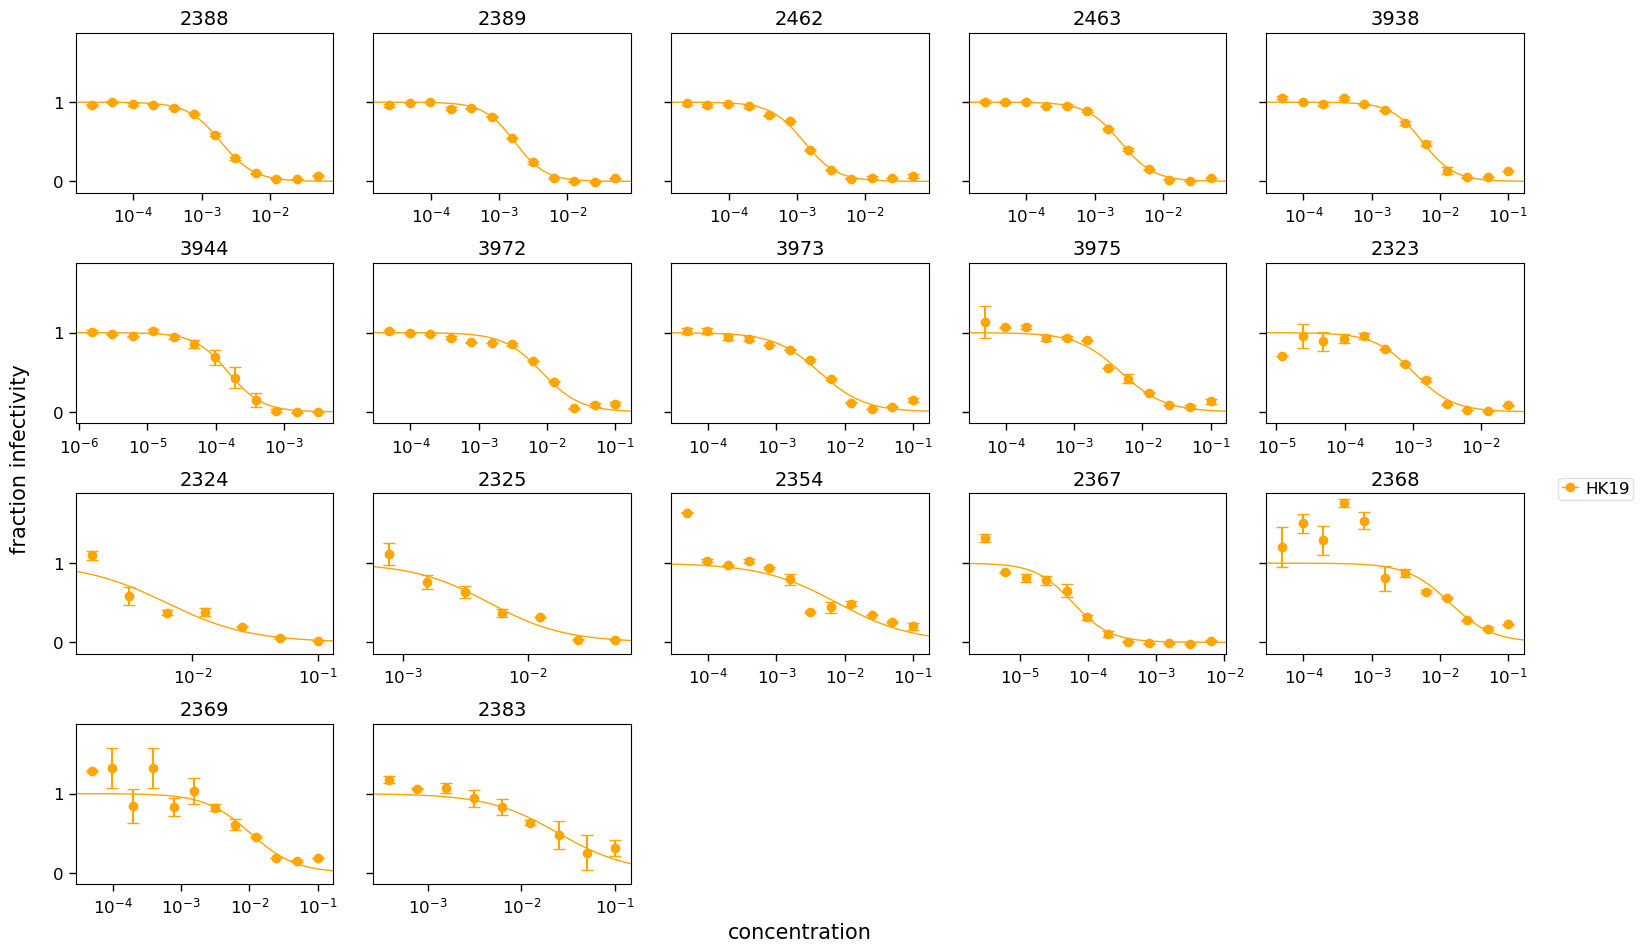

In [6]:
neut_data_final_1 = pd.read_csv('neut_data/230212_neuts_tidy.csv')
neut_data_final_2 = pd.read_csv('neut_data/230214_neuts_tidy.csv')

neut_data_final = pd.concat([neut_data_final_1, neut_data_final_2])

# ignore H6 measurements - MOI issue with these plates
neut_data_final = neut_data_final.loc[neut_data_final['virus'] != 'H6']

# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data_final)

fig, axes = fits.plotSera(ncol=5,
                          virus_to_color_marker={
                              'HK19': ('orange', 'o'),
                          },
                          sharex = False
                         )

In [7]:
serum_ic99 = fits.fitParams(ics=[99])
serum_ic99.sort_values('ic99').head(8)

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
13,2367,HK19,average,2,0.001086,interpolated,0.00109,0.000060,1.586662,1,0
5,3944,HK19,average,2,0.002136,interpolated,0.00214,0.000154,1.748936,1,0
2,2462,HK19,average,2,0.016364,interpolated,0.0164,0.001266,1.795750,1,0
1,2389,HK19,average,2,0.018311,interpolated,0.0183,0.001676,1.921978,1,0
9,2323,HK19,average,2,0.022235,interpolated,0.0222,0.001022,1.491825,1,0
0,2388,HK19,average,2,0.025378,interpolated,0.0254,0.001915,1.778067,1,0
3,2463,HK19,average,2,0.031925,interpolated,0.0319,0.002381,1.770261,1,0
11,2325,HK19,average,2,0.050000,lower,>0.05,0.004909,1.435841,1,0


### 0-5yo, run 3
So far, we have 7 candidates with IC99<0.05. Continue screening for potent sera:

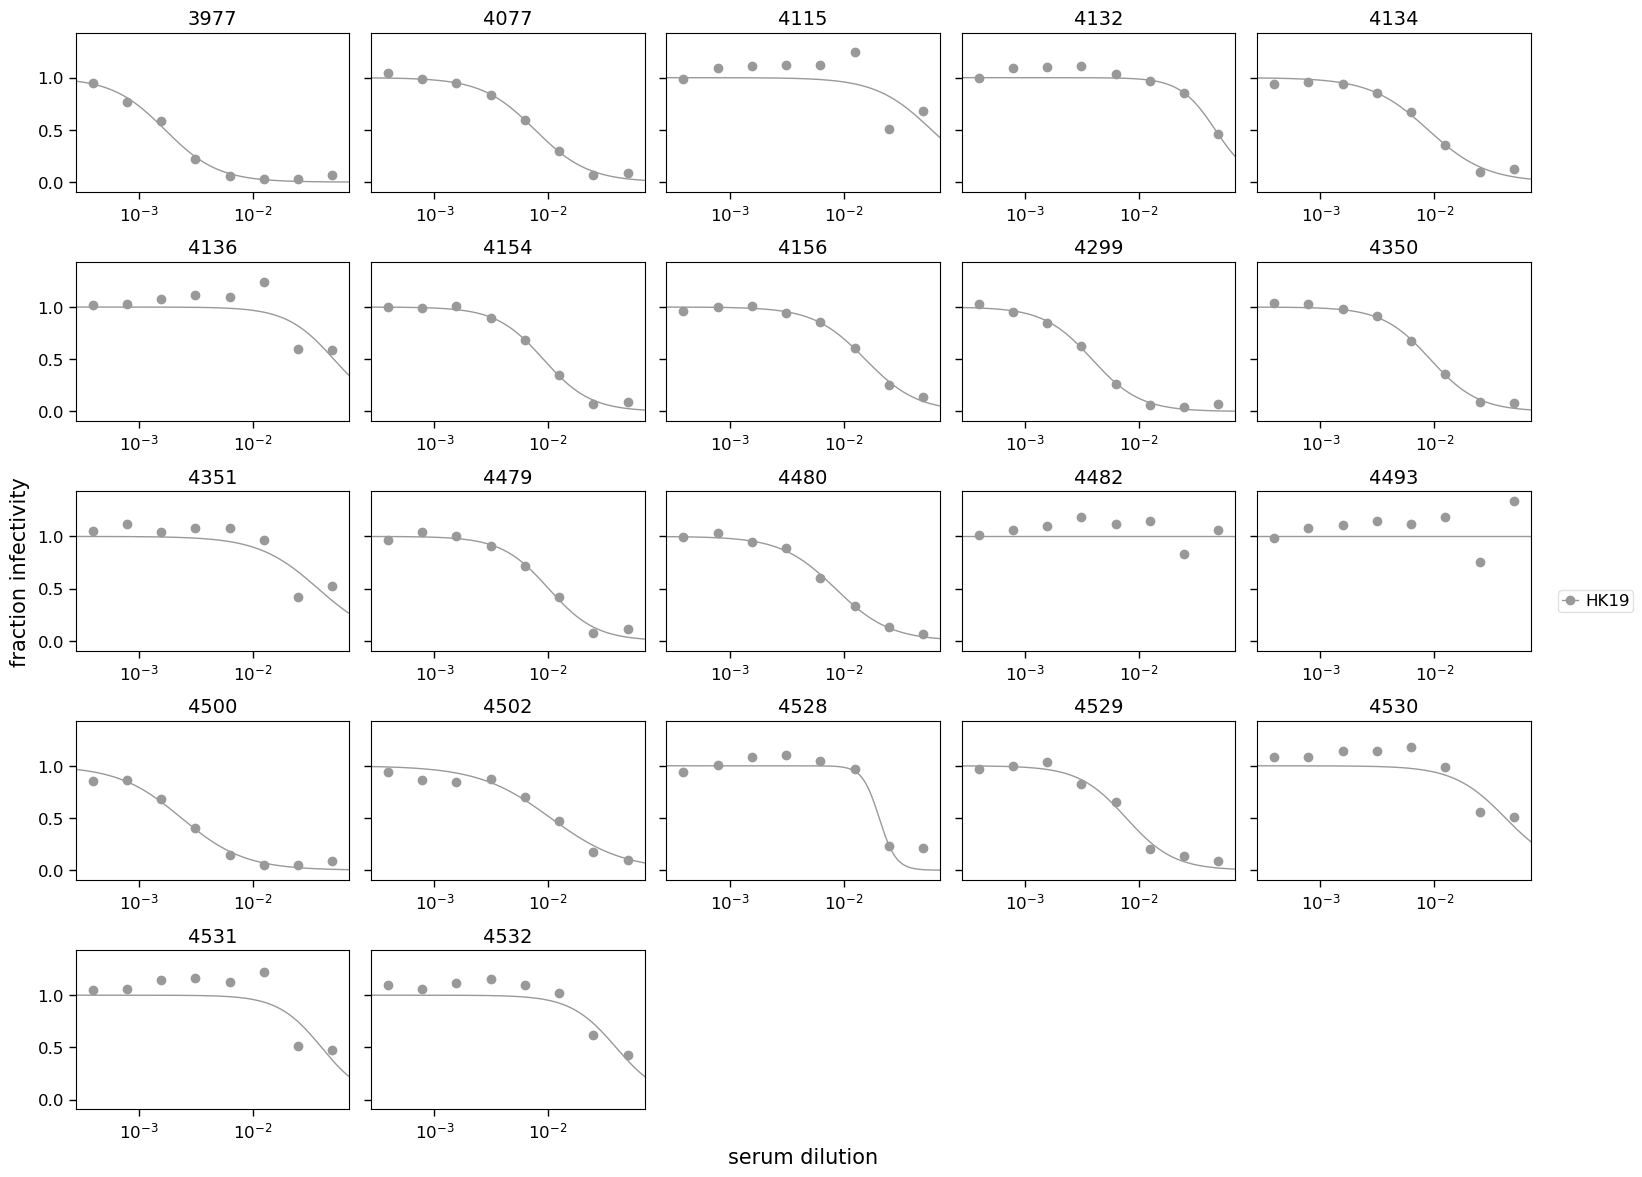

In [8]:
neut_data_run3 = pd.read_csv('neut_data/230217_neuts_tidy.csv')

fits = neutcurve.CurveFits(neut_data_run3)

fig, axes = fits.plotSera(ncol=5,
                          xlabel='serum dilution',
                          sharex = False
                         )

In [9]:
serum_ic99 = fits.fitParams(ics=[99])
serum_ic99.sort_values('ic99').head()

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
0,3977,HK19,average,1,0.019974,interpolated,0.02,0.001696,1.863327,1,0
8,4299,HK19,average,1,0.036645,interpolated,0.0366,0.003869,2.043739,1,0
15,4500,HK19,average,1,0.045013,interpolated,0.045,0.002359,1.558366,1,0
17,4528,HK19,average,1,0.045015,interpolated,0.045,0.020568,5.866561,1,0
19,4530,HK19,average,1,0.050000,lower,>0.05,0.042211,1.907191,1,0


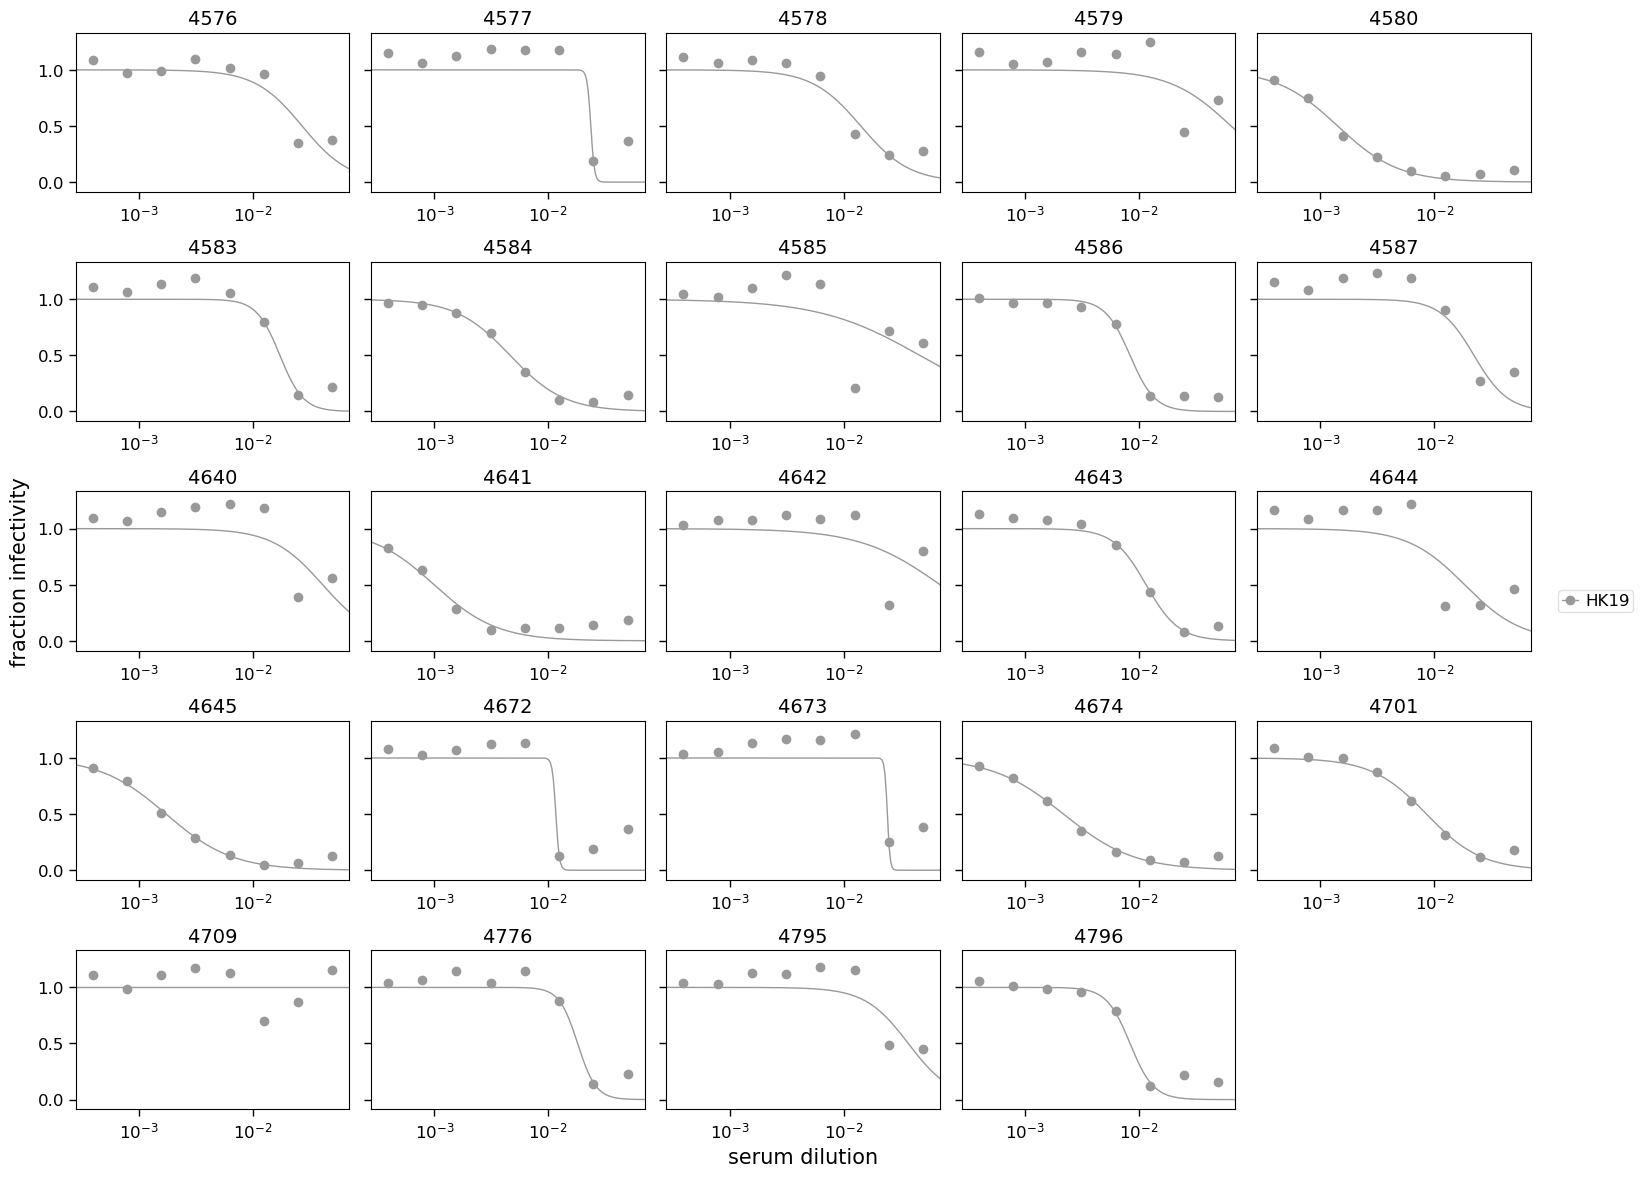

In [10]:
neut_data_run4 = pd.read_csv('neut_data/230223_neuts_tidy.csv')

fits = neutcurve.CurveFits(neut_data_run4)

fig, axes = fits.plotSera(ncol=5,
                          xlabel='serum dilution',
                          sharex = False
                         )

In [11]:
serum_ic99 = fits.fitParams(ics=[99])
serum_ic99.sort_values('ic99').head(9)

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
16,4672,HK19,average,1,0.013755,interpolated,0.0138,0.011681,28.122267,1,0
11,4641,HK19,average,1,0.018520,interpolated,0.0185,0.000995,1.571487,1,0
4,4580,HK19,average,1,0.024180,interpolated,0.0242,0.001414,1.618716,1,0
23,4796,HK19,average,1,0.024927,interpolated,0.0249,0.008360,4.206362,1,0
8,4586,HK19,average,1,0.026383,interpolated,0.0264,0.008351,3.994531,1,0
17,4673,HK19,average,1,0.027479,interpolated,0.0275,0.024261,36.896571,1,0
1,4577,HK19,average,1,0.028057,interpolated,0.0281,0.023691,27.168505,1,0
15,4645,HK19,average,1,0.037605,interpolated,0.0376,0.001731,1.492706,1,0
21,4776,HK19,average,1,0.042703,interpolated,0.0427,0.018142,5.368007,1,0


### 0-5yo candidates from followup screen

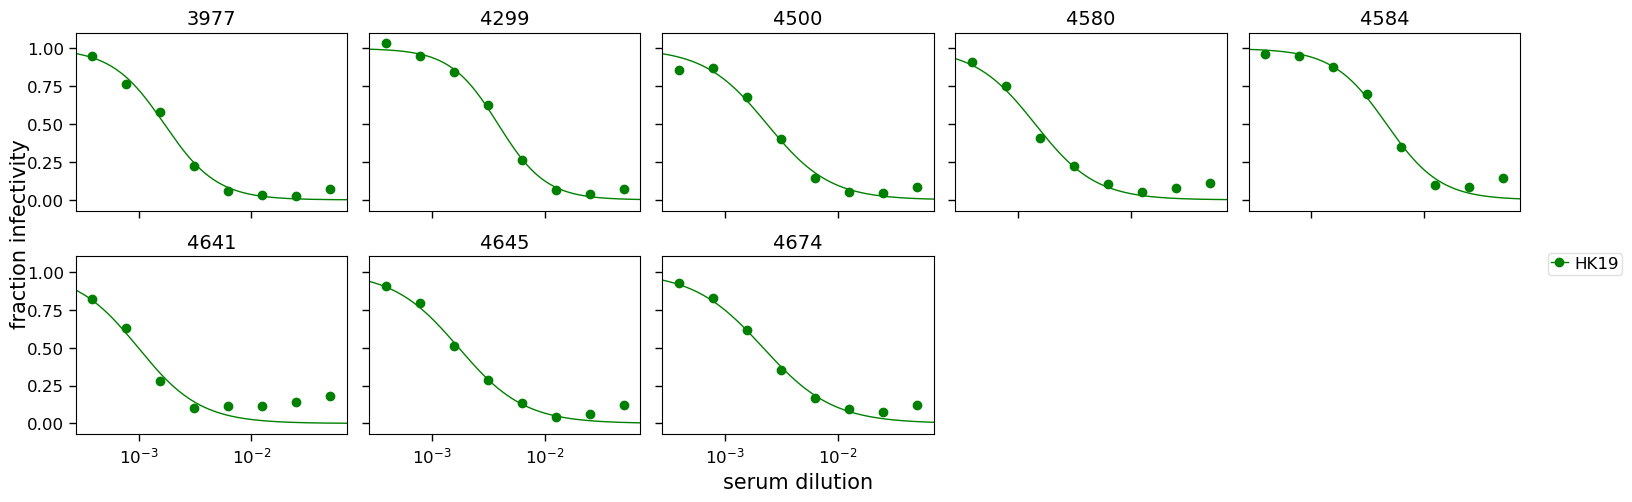

In [12]:
full_runs = pd.concat([neut_data_run3, neut_data_run4])
neut_hits_list = [3977, 4299, 4500, 4580, 4584, 4641, 4645, 4674]

neut_hits = full_runs[full_runs['serum'].isin(neut_hits_list)]

fits = neutcurve.CurveFits(neut_hits)

fig, axes = fits.plotSera(ncol=5,
                          xlabel='serum dilution',
                          virus_to_color_marker={
                              'HK19': ('green', 'o')
                          },
                          sharex = True
                         )

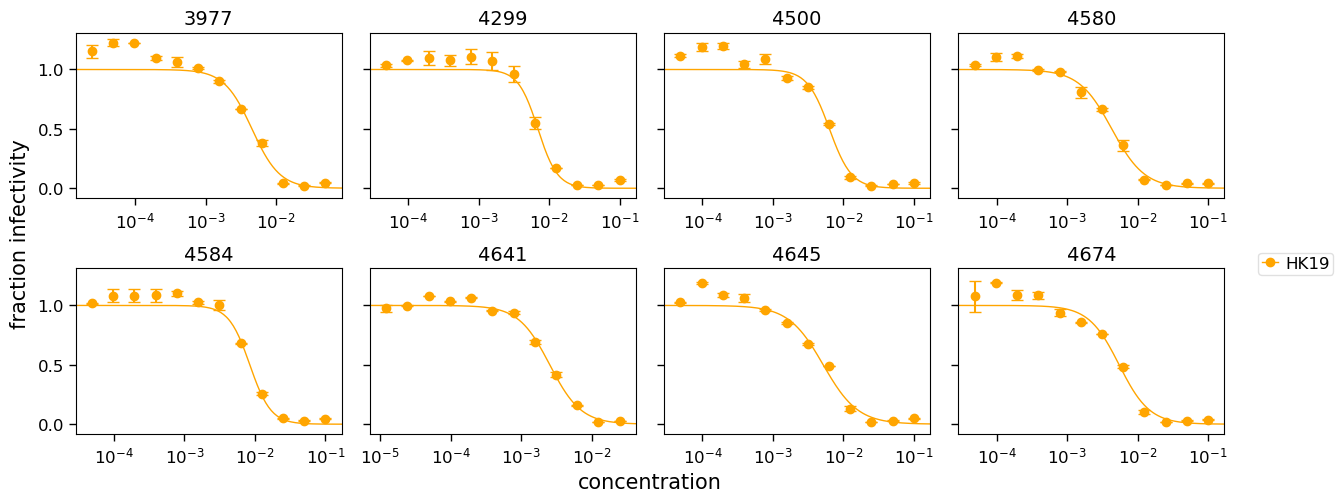

In [13]:
neut_data = pd.read_csv('neut_data/230228_neuts_tidy.csv')

neut_data = neut_data.loc[neut_data['virus'] != 'H6']

# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data)

fig, axes = fits.plotSera(ncol=4,
                          virus_to_color_marker={
                              'HK19': ('orange', 'o'),
                          },
                          sharex = False
                         )

In [14]:
serum_ic99 = fits.fitParams(ics=[99])
serum_ic99.sort_values('ic99')

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
5,4641,HK19,average,2,0.025000,lower,>0.025,0.002555,1.956383,1,0
1,4299,HK19,average,2,0.030265,interpolated,0.0303,0.006930,3.117191,1,0
2,4500,HK19,average,2,0.033283,interpolated,0.0333,0.006345,2.772449,1,0
0,3977,HK19,average,2,0.036510,interpolated,0.0365,0.004535,2.203189,1,0
4,4584,HK19,average,2,0.041114,interpolated,0.0411,0.008466,2.907743,1,0
3,4580,HK19,average,2,0.050205,interpolated,0.0502,0.004305,1.870728,1,0
7,4674,HK19,average,2,0.053850,interpolated,0.0538,0.005483,2.011358,1,0
6,4645,HK19,average,2,0.070064,interpolated,0.0701,0.005181,1.764421,1,0


## 15-20yo serum screening

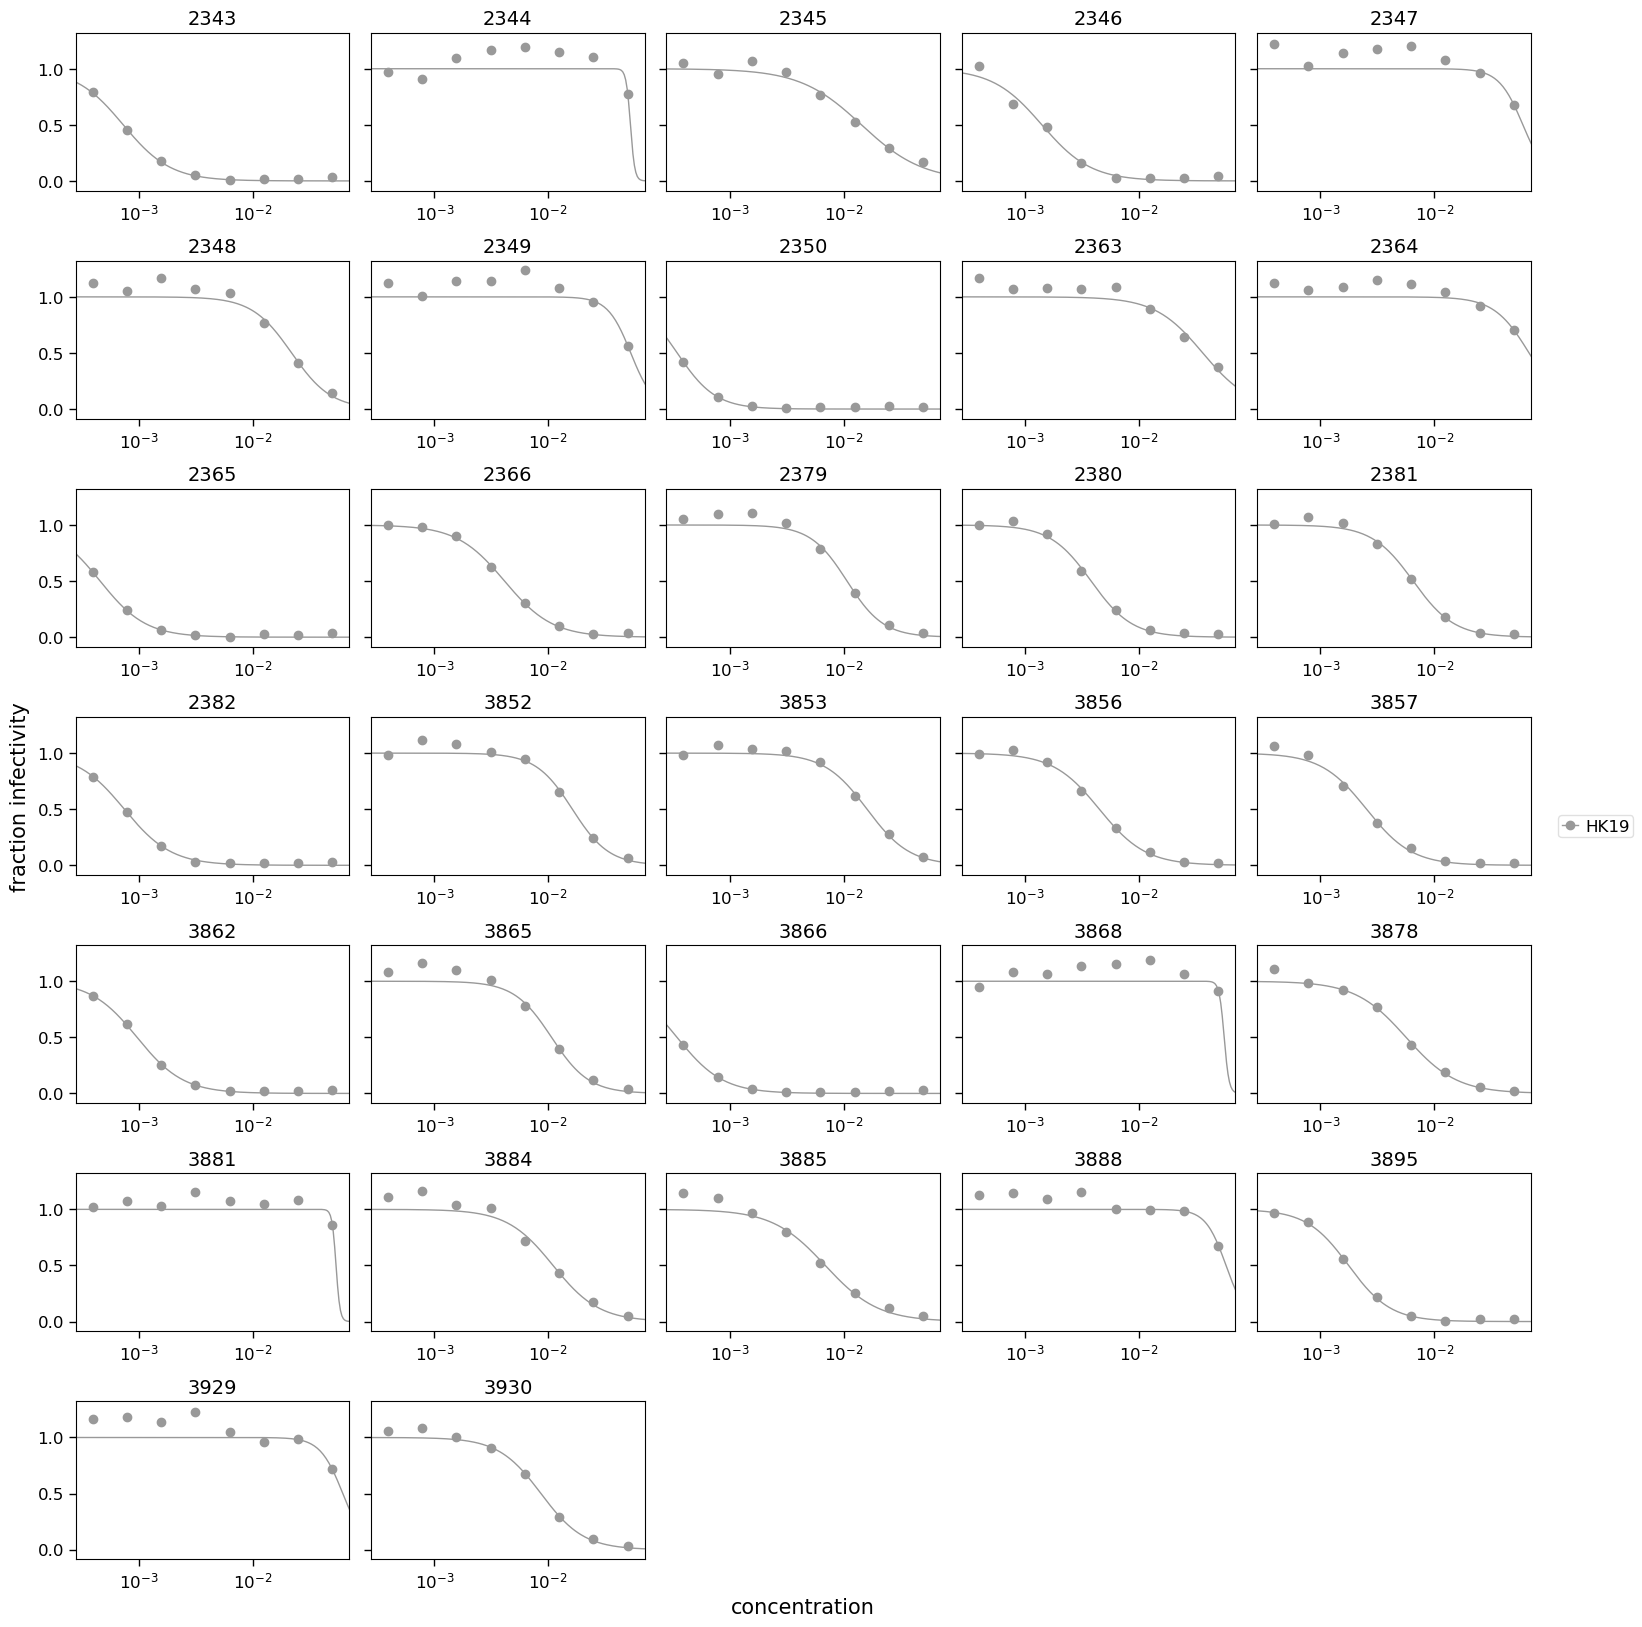

In [15]:
neut_data_teens = pd.read_csv('neut_data/230303_neuts_tidy.csv')

# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data_teens)

fig, axes = fits.plotSera(ncol=5,
                          sharex = False
                         )

### Clean run of top candidates

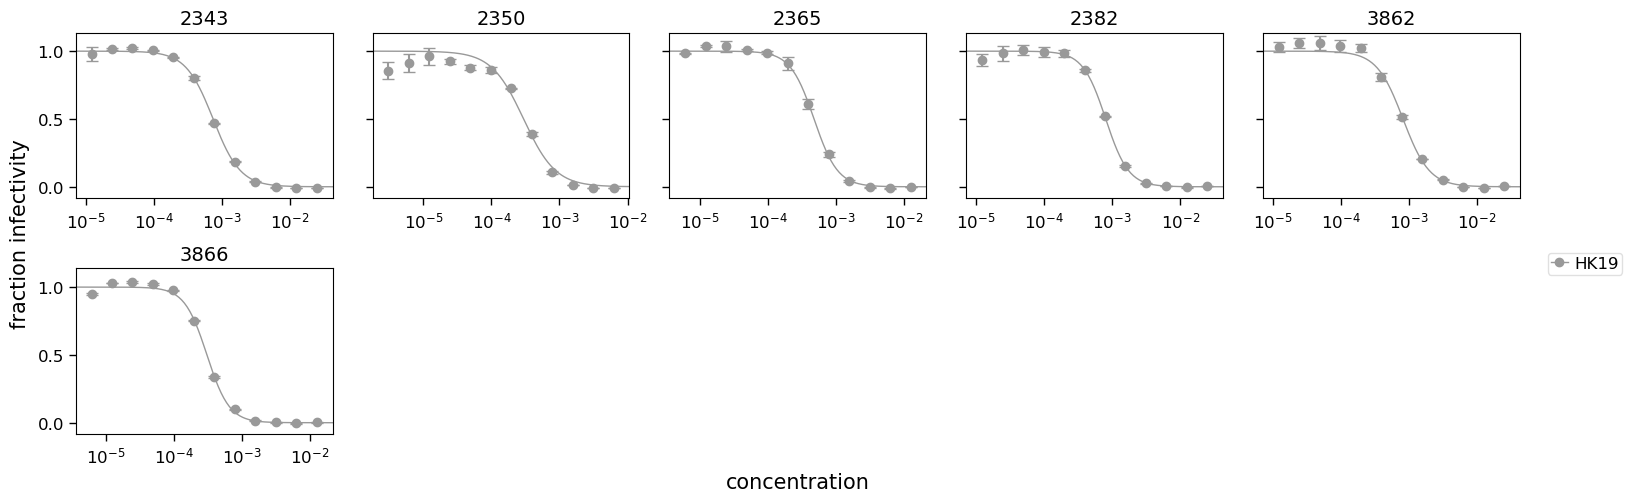

In [16]:
neut_data_teens_final = pd.read_csv('neut_data/230307_neuts_tidy.csv')

# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data_teens_final)

fig, axes = fits.plotSera(ncol=5,
                          sharex = False
                         )

In [17]:
serum_ic99 = fits.fitParams(ics=[99])
serum_ic99.sort_values('ic99')

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
5,3866,HK19,average,2,0.001737,interpolated,0.00174,0.000304,2.634083,1,0
2,2365,HK19,average,2,0.003005,interpolated,0.00301,0.000477,2.496628,1,0
1,2350,HK19,average,2,0.003603,interpolated,0.0036,0.000296,1.839504,1,0
3,2382,HK19,average,2,0.004743,interpolated,0.00474,0.000801,2.583242,1,0
0,2343,HK19,average,2,0.006258,interpolated,0.00626,0.000748,2.163454,1,0
4,3862,HK19,average,2,0.006307,interpolated,0.00631,0.000813,2.242576,1,0


## 40-45yo serum screening

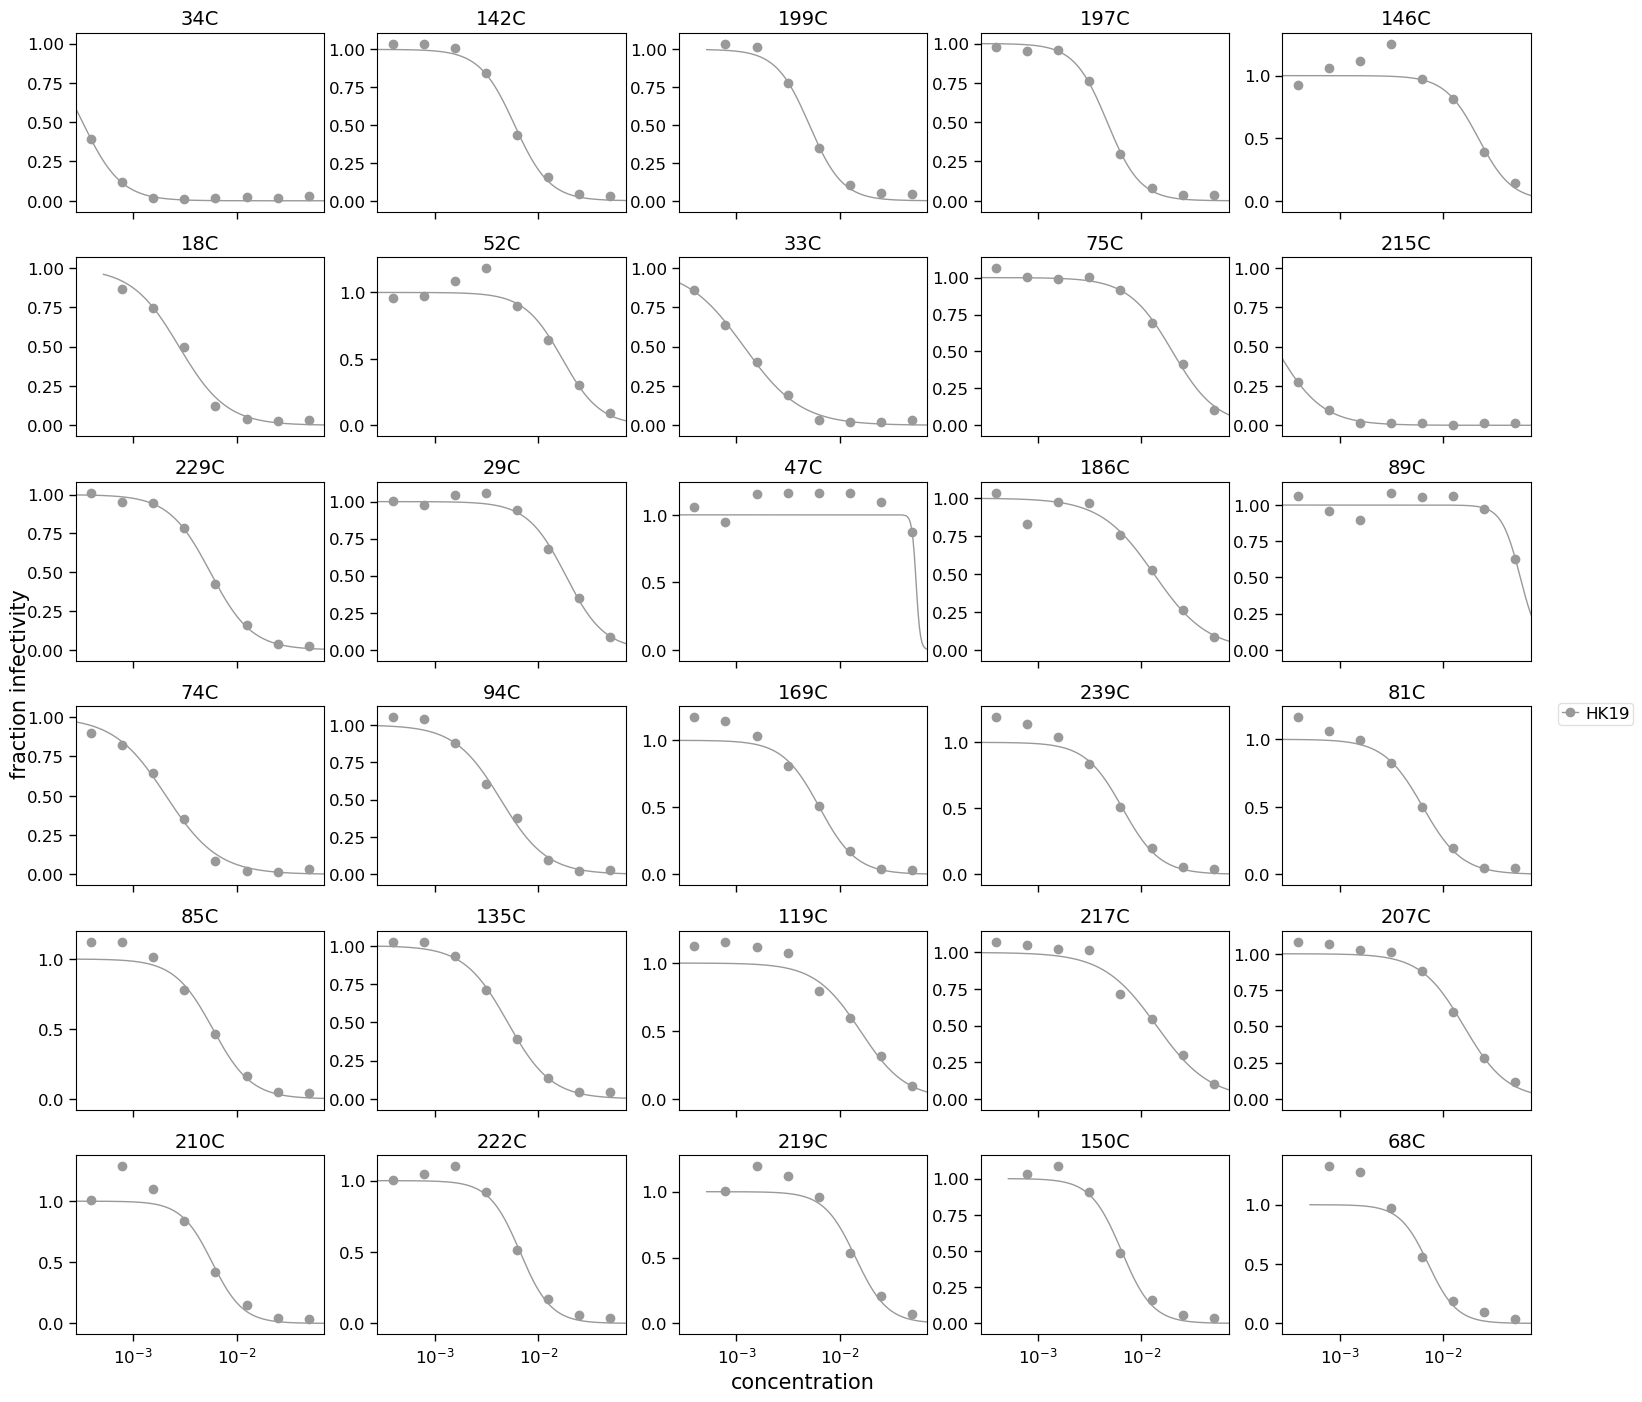

In [18]:
neut_data_adults = pd.read_csv('neut_data/230417_adult-neuts_tidy_edited.csv')

# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data_adults)

fig, axes = fits.plotSera(ncol=5,
                          sharex = True,
                          sharey = False
                         )

In [19]:
serum_ic99 = fits.fitParams(ics=[99])
serum_ic99.sort_values('ic99').head(11)

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
0,34C,HK19,average,1,0.002338,interpolated,0.00234,0.000324,2.323503,1,0
9,215C,HK19,average,1,0.002595,interpolated,0.0026,0.000237,1.920958,1,0
7,33C,HK19,average,1,0.021901,interpolated,0.0219,0.001180,1.573096,1,0
3,197C,HK19,average,1,0.025221,interpolated,0.0252,0.004663,2.722040,1,0
2,199C,HK19,average,1,0.027808,interpolated,0.0278,0.005075,2.701512,1,0
25,210C,HK19,average,1,0.028342,interpolated,0.0283,0.005798,2.895666,1,0
15,74C,HK19,average,1,0.029980,interpolated,0.03,0.002076,1.720802,1,0
29,68C,HK19,average,1,0.031041,interpolated,0.031,0.007191,3.141910,1,0
28,150C,HK19,average,1,0.031490,interpolated,0.0315,0.006416,2.888437,1,0
5,18C,HK19,average,1,0.031634,interpolated,0.0316,0.002783,1.890333,1,0


### Clean run of top candidates

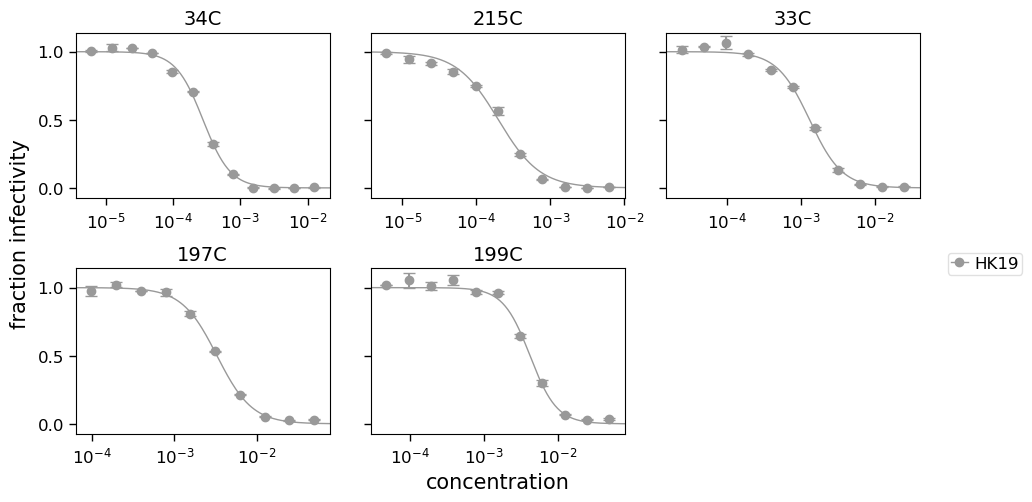

In [20]:
neut_data_adults_final = pd.read_csv('neut_data/230418_adult-sera-final_tidy.csv')

# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data_adults_final)

fig, axes = fits.plotSera(ncol=3,
                          sharex = False,
                         )

In [21]:
serum_ic99 = fits.fitParams(ics=[99])
serum_ic99.sort_values('ic99')

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
0,34C,HK19,average,2,0.002399,interpolated,0.0024,0.000279,2.135661,1,0
1,215C,HK19,average,2,0.003920,interpolated,0.00392,0.000198,1.540072,1,0
2,33C,HK19,average,2,0.013415,interpolated,0.0134,0.001307,1.973236,1,0
4,199C,HK19,average,2,0.028933,interpolated,0.0289,0.004247,2.394697,1,0
3,197C,HK19,average,2,0.031601,interpolated,0.0316,0.003295,2.032573,1,0
